This is an example of developing a script locally with the West Nile Virus data to share on Kaggle
Once you have a script you're ready to share, paste your code into a [new script](https://www.kaggle.com/c/predict-west-nile-virus/scripts/new).

In [10]:
# For working locally, you want to be in west_nile_scripts/working. 
# This command will move you to there, if you're in west_nile_scripts/src (where this file is).
!cd ../working/ # Not necessary for scripts running on Kaggle

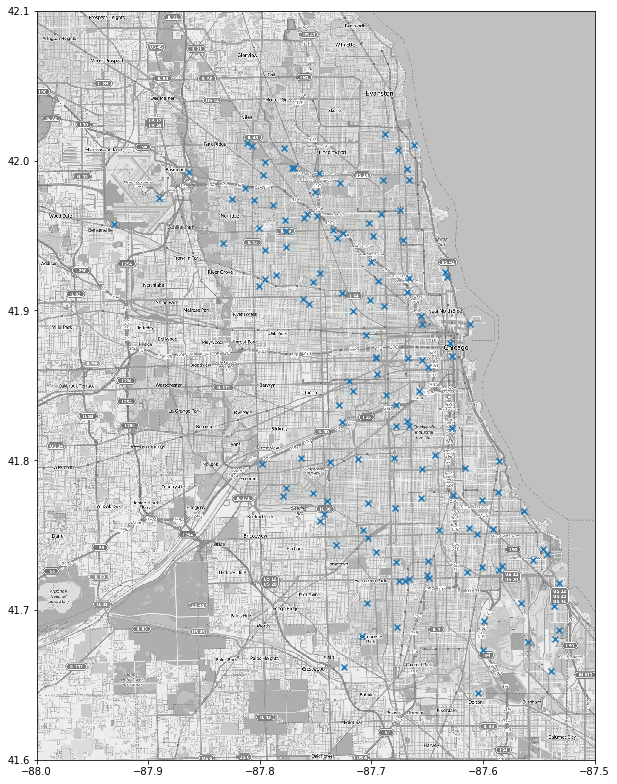

In [1]:
# Code is borrowed from: https://www.kaggle.com/users/213536/vasco/predict-west-nile-virus/west-nile-heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

# Add this when copying to a script on Kaggle:
#plt.savefig('heatmap.png')

In [7]:
#plt.savefig('heatmap.png')

In [183]:
data = pd.read_csv('../input/train.csv')
data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [184]:
#cleans data and does some simple featuring engineering. I did this to clean up the code and make it easy to read
def clean_data(data):
    
    data.Date = pd.to_datetime(data.Date, format='%Y-%m-%d')
    data['month'] = data['Date'].map(lambda x: x.month)
    data['day'] = data['Date'].map(lambda x: x.day)
    data['month_day'] = data['day'].map(lambda x: x/30) + data.month
    
    data['lat_long'] = data['Latitude'] * data['Longitude']
    data['lat_long'] = data['lat_long'].map(lambda x: round(x,3))
    
    final_data = data[['Species','Trap','Latitude','Longitude','lat_long','NumMosquitos','month','day','month_day','WnvPresent']]
    final_data = pd.get_dummies(final_data, columns = ['Species', 'Trap'])
    return final_data

In [185]:
clean_data(data)

,Latitude,Longitude,lat_long,NumMosquitos,month,day,month_day,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,41.954690,-87.800991,-3683.663,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.954690,-87.800991,-3683.663,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41.994991,-87.769279,-3685.870,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41.974089,-87.824812,-3686.366,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.974089,-87.824812,-3686.366,4,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41.921600,-87.666455,-3675.118,2,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,41.891118,-87.654491,-3671.945,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,41.867108,-87.654224,-3669.829,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,41.867108,-87.654224,-3669.829,2,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,41.896282,-87.655232,-3672.428,1,5,29,5.966667,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# i have not summed up mosquitos yet.

### concat/merge weather data

In [111]:
from imblearn.over_sampling import SMOTE

In [155]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split


rf = RandomForestClassifier(n_jobs=-1, n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(labels = ['WnvPresent'], axis=1),
                                                    final_data['WnvPresent'],
                                                    test_size = .25,
                                                    random_state = 42)

y_train.head()

812     1
1092    0
3032    0
4060    0
4372    0
Name: WnvPresent, dtype: int64

In [157]:
#oversampling on training data only, to prevent leakage to testing data.
sm = SMOTE(random_state=42, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


In [158]:
#np.unique(y_train_res, return_counts=True)

(array([0, 1], dtype=int64), array([7462, 7462], dtype=int64))

In [159]:
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test) #but score accuracy doesn't tell the whole story, we want sensitivity aka recall

0.9390940236010659

In [160]:
from sklearn.metrics import recall_score
y_pred = rf.predict(X_test)
recall_score(y_test, y_pred)

0.208955223880597

In [125]:
important_features = pd.Series(data=rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

month                             1.616579e-01
NumMosquitos                      1.552140e-01
month_day                         1.378042e-01
Species_CULEX PIPIENS             1.008450e-01
day                               5.672254e-02
Species_CULEX PIPIENS/RESTUANS    4.894413e-02
Longitude                         4.381102e-02
Species_CULEX RESTUANS            4.322894e-02
lat_long                          3.396324e-02
Latitude                          3.043164e-02
Trap_T900                         1.136807e-02
Trap_T225                         8.183666e-03
Trap_T115                         5.935118e-03
Trap_T002                         5.507226e-03
Trap_T082                         5.505372e-03
Trap_T086                         4.727625e-03
Trap_T114                         4.701676e-03
Trap_T235                         4.582551e-03
Trap_T031                         4.179452e-03
Trap_T003                         3.967387e-03
Trap_T102                         3.613124e-03
Trap_T223    

In [173]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score

#if fitting multiple models, have dictionary of 'model name' : model, and loop through to plot AUC ROC curve
def plot_roc(model):
    probas = model.predict_proba(X_test)
    probs = probas[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    # method I: plt
    #import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr,
             color = 'b',
             label = 'AUC = {0}'.format(roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

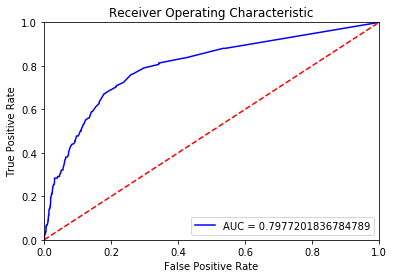

In [181]:
plot_roc(rf)